In [17]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import axes3d, Axes3D

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.models import Sequential
from keras.layers import Dense

from keras.models import Model
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten
from keras import regularizers
from keras.layers.merge import concatenate

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from scipy.stats import ks_2samp

os.chdir('../src/')
import ml_analysis_plotting

In [18]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [19]:
os.chdir('../data')

In [22]:
tree = uproot.open('oneNewKINNW_MC16e.root')[b'features;2']
#tree.keys()

In [23]:
tree.keys()

[b'top_pt',
 b'top_eta',
 b'top_phi',
 b'tbar_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'nu_top_pt',
 b'nu_top_eta',
 b'nu_top_phi',
 b'nu_tbar_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'b_pt',
 b'b_eta',
 b'b_phi',
 b'bbar_pt',
 b'bbar_eta',
 b'bbar_phi',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'top_m',
 b'tbar_m',
 b'lep_top_m',
 b'lep_tbar_m',
 b'nu_top_m',
 b'nu_tbar_m',
 b'b1_m',
 b'b2_m',
 b'ttbar_m',
 b'met',
 b'met_x',
 b'met_y',
 b'c_nn',
 b'c_rr',
 b'c_kk',
 b'c_rk',
 b'c_kr',
 b'c_nr',
 b'c_rn',
 b'c_nk',
 b'c_kn',
 b'c_nk_p_kn',
 b'c_nr_p_rn',
 b'c_rk_p_kr',
 b'c_nk_m_kn',
 b'c_nr_m_rn',
 b'c_rk_m_kr',
 b'b_kplus',
 b'b_nplus',
 b'b_rplus',
 b'b_kminus',
 b'b_nminus',
 b'b_rminus',
 b'lep_delta_phi',
 b'lep_delta_eta',
 b'top_delta_phi',
 b'top_delta_eta',
 b'lep_dphi_bypt',
 b'costheta_leps_a_k',
 b'costheta_leps_a_n',
 b'costheta_leps_a_r',
 b'costheta_leps_b_k',
 b'costheta_lep

In [6]:
tree = uproot.open('KINNW_MC16e_nomSignal_mlpreped_temp/out_proc_0_copy.root')["features"]
tree.keys()

[b'top_pt',
 b'top_eta',
 b'top_phi',
 b'tbar_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'nu_top_pt',
 b'nu_top_eta',
 b'nu_top_phi',
 b'nu_tbar_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'b_pt',
 b'b_eta',
 b'b_phi',
 b'bbar_pt',
 b'bbar_eta',
 b'bbar_phi',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'top_m',
 b'tbar_m',
 b'lep_top_m',
 b'lep_tbar_m',
 b'nu_top_m',
 b'nu_tbar_m',
 b'b1_m',
 b'b2_m',
 b'ttbar_m',
 b'met',
 b'met_x',
 b'met_y',
 b'c_nn',
 b'c_rr',
 b'c_kk',
 b'c_rk',
 b'c_kr',
 b'c_nr',
 b'c_rn',
 b'c_nk',
 b'c_kn',
 b'c_nk_p_kn',
 b'c_nr_p_rn',
 b'c_rk_p_kr',
 b'c_nk_m_kn',
 b'c_nr_m_rn',
 b'c_rk_m_kr',
 b'b_kplus',
 b'b_nplus',
 b'b_rplus',
 b'b_kminus',
 b'b_nminus',
 b'b_rminus',
 b'lep_delta_phi',
 b'lep_delta_eta',
 b'top_delta_phi',
 b'top_delta_eta',
 b'lep_dphi_bypt',
 b'costheta_leps_a_k',
 b'costheta_leps_a_n',
 b'costheta_leps_a_r',
 b'costheta_leps_b_k',
 b'costheta_lep

In [18]:
features_list = [
'KIN_truth_topdeltaR',
'KIN_truth_tbardeltaR',
#b'diff_KINtruth_c_nn',
# b'diff_KINtruth_c_rr',
# b'diff_KINtruth_c_kk',
# b'diff_KINtruth_c_rk',
# b'diff_KINtruth_c_kr',
# b'diff_KINtruth_c_nr',
# b'diff_KINtruth_c_rn',
# b'diff_KINtruth_c_nk',
# b'diff_KINtruth_c_kn',
# b'diff_KINtruth_c_nk_p_kn',
# b'diff_KINtruth_c_nr_p_rn',
# b'diff_KINtruth_c_rk_p_kr',
# b'diff_KINtruth_c_nk_m_kn',
# b'diff_KINtruth_c_nr_m_rn',
# b'diff_KINtruth_c_rk_m_kr',
 'diff_KINtruth_b_kplus',
 'diff_KINtruth_b_nplus', 
 'diff_KINtruth_b_rplus',
 'diff_KINtruth_b_kminus',
 'diff_KINtruth_b_nminus',
 'diff_KINtruth_b_rminus',
 'NW_truth_topdeltaR',
 'NW_truth_tbardeltaR',
 'diff_NWtruth_b_kplus',
 'diff_NWtruth_b_nplus',
 'diff_NWtruth_b_rplus',
 'diff_NWtruth_b_kminus',
 'diff_NWtruth_b_nminus',
 'diff_NWtruth_b_rminus',
]

"""
features_list = [
#b'top_eta',
#b'top_phi',
#b'top_pt',
#b'tbar_eta',
#b'tbar_phi',
#b'tbar_pt',
b'lep_t_pt',
b'lep_t_eta',
b'lep_t_phi',
b'lep_tbar_pt',
b'lep_tbar_eta',
b'lep_tbar_phi',
b'lep_delta_phi',
b'lep_delta_eta',
b'leps_dotp',
#b'top_delta_phi',
#b'top_delta_eta',
b'costheta_leps_a_k',
b'costheta_leps_a_n',
b'costheta_leps_a_r',
b'costheta_leps_b_k',
b'costheta_leps_b_n',
b'b1_m',
b'b2_m',
#b'ttbar_m',
b'met',
b'met_x',
b'met_y',
b'b_kminus'
]
"""

"\nfeatures_list = [\n#b'top_eta',\n#b'top_phi',\n#b'top_pt',\n#b'tbar_eta',\n#b'tbar_phi',\n#b'tbar_pt',\nb'lep_t_pt',\nb'lep_t_eta',\nb'lep_t_phi',\nb'lep_tbar_pt',\nb'lep_tbar_eta',\nb'lep_tbar_phi',\nb'lep_delta_phi',\nb'lep_delta_eta',\nb'leps_dotp',\n#b'top_delta_phi',\n#b'top_delta_eta',\nb'costheta_leps_a_k',\nb'costheta_leps_a_n',\nb'costheta_leps_a_r',\nb'costheta_leps_b_k',\nb'costheta_leps_b_n',\nb'b1_m',\nb'b2_m',\n#b'ttbar_m',\nb'met',\nb'met_x',\nb'met_y',\nb'b_kminus'\n]\n"

In [19]:
features_array = get_input_arrays(tree, features_list)

(76999, 16)
[ 1.09583734  0.25042072 -0.55182012 -0.00411721  0.27739799 -0.18570226
  0.05017502  0.3119578   1.29683881  0.36490154 -0.42957198  0.0055061
 -0.33519234 -0.0171585   0.24380307  0.17310645]


In [20]:
cox = np.zeros((features_array.shape[1],features_array.shape[1]))

In [21]:
for i in range(features_array.shape[1]):
    a = (features_array[:,i] - np.mean(features_array[:,i]))
    for j in range(features_array.shape[1]):
        b = (features_array[:,j] - np.mean(features_array[:,j]))
        covAB = np.cov(a,b)/(np.std(features_array[:,i])*np.std(features_array[:,j]))
        cox[j,i] = covAB[1,0]
#print(cox)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5]
['KIN_truth_topdeltaR', 'KIN_truth_tbardeltaR', 'diff_KINtruth_b_kplus', 'diff_KINtruth_b_nplus', 'diff_KINtruth_b_rplus', 'diff_KINtruth_b_kminus', 'diff_KINtruth_b_nminus', 'diff_KINtruth_b_rminus', 'NW_truth_topdeltaR', 'NW_truth_tbardeltaR', 'diff_NWtruth_b_kplus', 'diff_NWtruth_b_nplus', 'diff_NWtruth_b_rplus', 'diff_NWtruth_b_kminus', 'diff_NWtruth_b_nminus', 'diff_NWtruth_b_rminus']


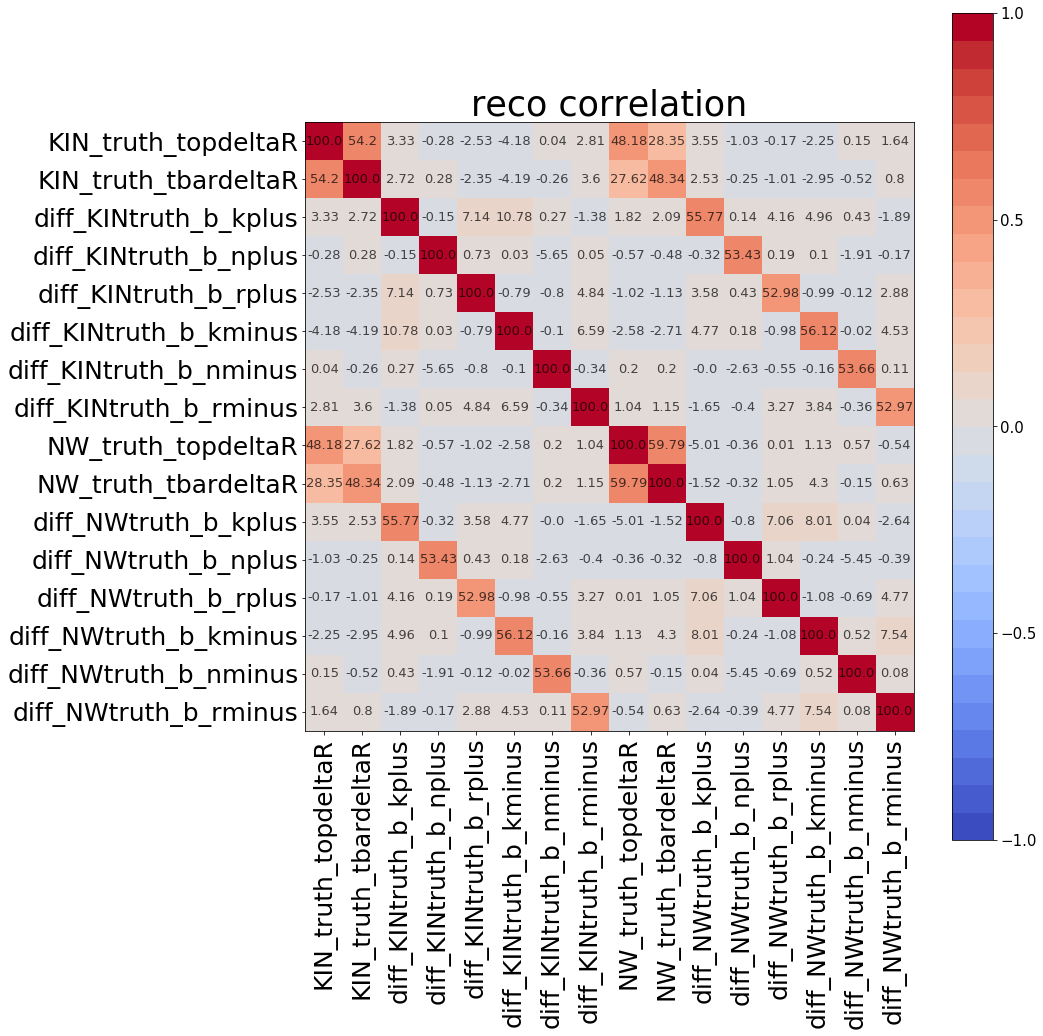

In [22]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('coolwarm', 30)
size = 4

# Limits for the extent
x_start = 0.0
x_end = features_array.shape[1]
y_start = 0.0
y_end = features_array.shape[1]

extent = [x_start, x_end, y_start, y_end]

cax = ax1.imshow(cox, interpolation="nearest", cmap=cmap, vmin=-1., vmax=1., extent=extent)
#ax1.grid(True)
plt.title('reco correlation', fontsize=35)
l = np.arange(.5, features_array.shape[1]+0.5, step=1.0)
print(l)
plt.xticks(ticks=l,  rotation='vertical')
plt.yticks(ticks=l)
print(features_list)
ax1.set_xticklabels(features_list,fontsize=25)
ax1.set_yticklabels(features_list[::-1],fontsize=25)

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for (j,i),label in np.ndenumerate(np.rot90(np.round(cox*100., 2), k=1)):
    ax1.text(i+.5,j+.5,label,ha='center',va='center', fontsize=13, alpha=.7)
    #ax2.text(i,j,label,ha='center',va='center')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1.,-.5,.0,.5,1.])
cbar.ax.tick_params(labelsize=15)
plt.tight_layout()
plt.savefig('correlations')
plt.show()
